# Polycrystalline graphene

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from stm.register import create_template, RegularPolygon
from stm.segment import segment_neighbors, segment_holes
from stm.utils.plotutils import add_segment_patches, discrete_cmap, add_colorbar

In [2]:
points = np.load('data/poly_graphene.npy')

a = np.array([0, 1])
b = np.array([np.sin(2/3*np.pi), np.cos(2/3*np.pi)])
basis = np.array([[0,0], [1/np.sqrt(3), 0]])

template = create_template(a, b, basis, n_points=4)

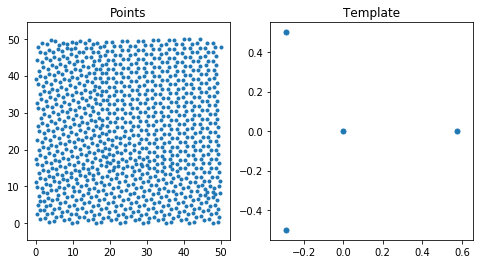

In [3]:
fig,axes = plt.subplots(1,2, figsize=(8,4))

axes[0].plot(points[:,0], points[:,1], 'o', markersize=3)
axes[0].set_title('Points')

axes[1].plot(template[:,0], template[:,1], 'o', markersize=5)
axes[1].set_title('Template')

for ax in axes:
    ax.axis('equal');

In [4]:
segments = segment_neighbors(points, n_points = 4)

segments.match(template, scale_invariant=True, rmsd_max=.4)

segments.calibrate_strain(proportiontocut=.4)

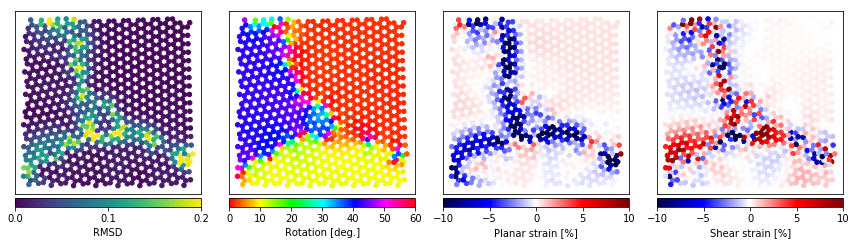

In [5]:
size=20
rotation = segments.rotation
rotation[~np.isnan(rotation)] = segments.rotation[~np.isnan(rotation)] % (2*np.pi/6)
planar = (segments.strain[:,0,0] + segments.strain[:,1,1])/2

fig,axes = plt.subplots(1,4, figsize=(12,4))
m = axes[0].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.rmsd, vmin=0, vmax=.2, s=size)
add_colorbar(axes[0], m, loc='bottom', ticks=np.linspace(0,.2,3), label='RMSD')

m = axes[1].scatter(segments.origins[:,0], segments.origins[:,1], c=rotation/np.pi*180, 
                cmap='hsv', vmin=0, vmax=60, s=size)
add_colorbar(axes[1], m, loc='bottom', label = 'Rotation [deg.]')

m = axes[2].scatter(segments.origins[:,0], segments.origins[:,1], c=planar * 100, 
                cmap='seismic', vmin=-10, vmax=10, s=size)
add_colorbar(axes[2], m, loc='bottom', ticks=np.linspace(-10,10,5), label = 'Planar strain [%]')

axes[3].scatter(segments.origins[:,0], segments.origins[:,1], c=segments.strain[:,0,1] * 100, 
                cmap='seismic', vmin=-10, vmax=10, s=size)
add_colorbar(axes[3], m, loc='bottom', ticks=np.linspace(-10,10,5), label = 'Shear strain [%]')

for ax in axes.ravel():
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()

## Segmentation by holes

In [6]:
segments = segment_holes(points, k=.6)

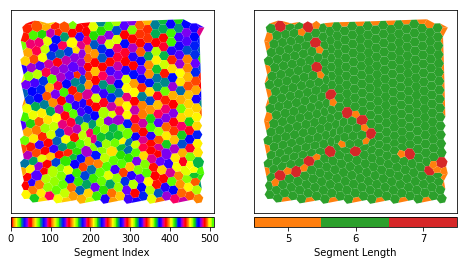

In [7]:
fig,axes = plt.subplots(1,2, figsize=(8,4))

m = add_segment_patches(axes[0], segments, np.arange(len(segments)), cmap='prism')
add_colorbar(axes[0], m, loc='bottom', label='Segment Index')

m = add_segment_patches(axes[1], segments, segments.lengths, cmap=discrete_cmap(range(1,4)), clim=[4.5,7.5])
add_colorbar(axes[1], m, loc='bottom', label='Segment Length', ticks=[5,6,7])

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

In [8]:
segments.match(RegularPolygon(sidelength=1), rmsd_max=.25)

segments.calibrate_strain(.3)

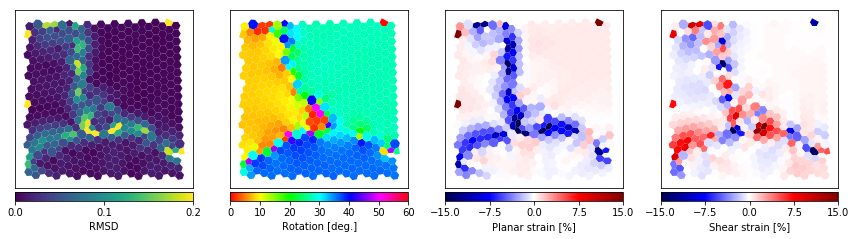

In [9]:
fig,axes = plt.subplots(1,4, figsize=(12,4))

m = add_segment_patches(axes[0], segments, segments.rmsd, cmap='viridis', clim=[0,.2])
add_colorbar(axes[0], m, loc='bottom', ticks=np.linspace(0,.2,3), label='RMSD')

m = add_segment_patches(axes[1], segments, segments.rotation/np.pi*180, cmap='hsv', clim=[0,60])
add_colorbar(axes[1], m, loc='bottom', label = 'Rotation [deg.]')

m = add_segment_patches(axes[2], segments, (segments.strain[:,0,0] + segments.strain[:,1,1])/2*100, 
                        cmap='seismic', clim=[-15,15])
add_colorbar(axes[2], m, loc='bottom', ticks=np.linspace(-15,15,5), label = 'Planar strain [%]')

m = add_segment_patches(axes[3], segments, segments.strain[:,0,1]*100, cmap='seismic', clim=[-15,15])
add_colorbar(axes[3], m, loc='bottom', ticks=np.linspace(-15,15,5), label = 'Shear strain [%]')

for ax in axes:
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()